In [517]:
# ID Unique transaction ID
# DOMAIN_ID Unique ID for the web domain
# MACHINE_ID Unique ID for the computer (household) on which the transaction was made
# SITE_SESSION_ID Unique ID for the session in which the transaction was made
# TRANS_FREQ Total number of transactions for the household during 2011.
# DOMAIN_NAME The website (domain) name where the transaction was made
# DIRECTP_D A dummy variable indicating whether the transaction is incurred directly from a hotel website (1) or other third_party travel website (0).
# PROD_NAME The product (e.g., hotel or packages) purchased by the household
# PROD_QTY The number of products purchased in this transaction
# PROD_TOTPRICE Total price paid for this transaction
# REF_DOMAIN_NAME The referring website (domain) name through which the final purchase website was reached
# DURATION Total time spent at a site (mins)
# PAGES_VIEWED Total pages viewed at a site
# HOUSEHOLD_SIZE Total number of people in the household
# CHILDREN_D A dummy variable indicating whether the household has any children (1) or not (0).
# CONNECTIONSPEED_D A dummy variable indicating whether the household has high speed internet connection (1) or not (0)

In [518]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [519]:
hotel = pd.read_excel('HotelClickStream-1.xls')

In [562]:
hotel.head(3)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2848.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2407.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2169.000000,google.com,20.058594,19,1,0,1,1.0,7.682022


In [521]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3749 non-null   int64  
 1   DOMAIN_ID          3749 non-null   uint64 
 2   MACHINE_ID         3749 non-null   int64  
 3   SITE_SESSION_ID    3749 non-null   int64  
 4   TRANS_FREQ         3749 non-null   int64  
 5   DOMAIN_NAME        3749 non-null   object 
 6   DIRECTP_D          3749 non-null   int64  
 7   PROD_NAME          3749 non-null   object 
 8   PROD_QTY           3749 non-null   int64  
 9   PROD_TOTPRICE      3749 non-null   float64
 10  REF_DOMAIN_NAME    1687 non-null   object 
 11  DURATION           3749 non-null   float64
 12  PAGES_VIEWED       3749 non-null   int64  
 13  HOUSEHOLD_SIZE     3749 non-null   int64  
 14  CHILDREN_D         3749 non-null   int64  
 15  CONNECTIONSPEED_D  3749 non-null   int64  
dtypes: float64(2), int64(10)

In [598]:
#top 10 domain names that generated the most volume of transactions
p1 = hotel.groupby('DOMAIN_NAME')["ID"].count().nlargest(10)
# p1 = pd.pivot_table( hotel, 
#                   index=["DOMAIN_NAME"], 
#                   values = 'ID',
#                     aggfunc=['count'] )
print(p1)

DOMAIN_NAME
marriott.com        524
hilton.com          438
hotels.com          400
expedia.com         380
priceline.com       309
choicehotels.com    297
jetblue.com         229
hotwire.com         217
bestwestern.com     120
orbitz.com          109
Name: ID, dtype: int64


In [523]:
#the top 10 reference domain names that generated the most volume of transactions
hotel.groupby('REF_DOMAIN_NAME')["ID"].count().nlargest(10)

REF_DOMAIN_NAME
google.com           620
yahoo.com            222
bing.com             129
aol.com               53
comfortinn.com        48
jetblue.com           43
qualityinn.com        29
comfortsuites.com     22
kayak.com             20
mywebsearch.com       17
Name: ID, dtype: int64

In [524]:
hotel.loc[hotel.REF_DOMAIN_NAME.isnull() == True,'Ref_D'] = 0
hotel.loc[hotel.REF_DOMAIN_NAME.isnull() == False,'Ref_D'] = 1

In [525]:
hotel['Ref_D'].head(10)

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Ref_D, dtype: float64

In [526]:
hotel.columns
hotel.head(3)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0


In [527]:
#np.log(hotel['PROD_TOTPRICE'])
hotel["PROD_TOTPRICE"] = hotel["PROD_TOTPRICE"] + 1
hotel.loc[hotel.PROD_TOTPRICE > 0,'LOG_PRICE'] = np.log(hotel['PROD_TOTPRICE'])
#hotel.loc[hotel.PROD_TOTPRICE <= 0,'LOG_PRICE'] = 'NaN'


In [528]:
hotel.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2848.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2407.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2169.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1959.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1798.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


In [529]:
hotel.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,0.481462,1.717258,164.859624,25.317508,18.331288,3.273940,0.603894,0.992265,0.449987,4.439926
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,0.499723,1.387385,184.484515,22.806497,16.636523,4.388536,0.489152,0.087622,0.497559,1.615478
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,1.000000,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,0.000000,1.000000,72.950000,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.289774
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,0.000000,1.000000,116.990000,17.777344,13.000000,3.000000,1.000000,1.000000,0.000000,4.762088
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,1.000000,2.000000,200.980000,33.656250,23.000000,4.000000,1.000000,1.000000,1.000000,5.303205
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2848.039993,227.343750,141.000000,99.000000,1.000000,1.000000,1.000000,7.954386


In [530]:
hotel.LOG_PRICE.describe()

count    3749.000000
mean        4.439926
std         1.615478
min         0.000000
25%         4.289774
50%         4.762088
75%         5.303205
max         7.954386
Name: LOG_PRICE, dtype: float64

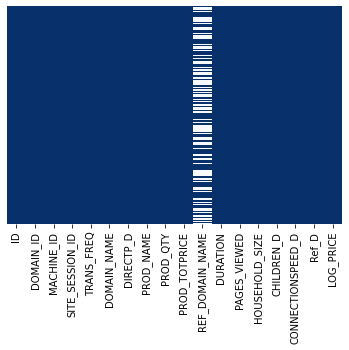

In [605]:
sns.heatmap(hotel.isna(),yticklabels=False,cbar=False,cmap="Blues_r")
plt.savefig('na.png')

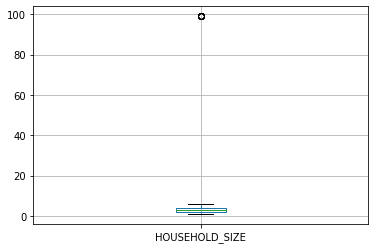

In [606]:
boxplot_ad = hotel.boxplot(column=['HOUSEHOLD_SIZE'])  
#outliers?
plt.savefig('box1.png')

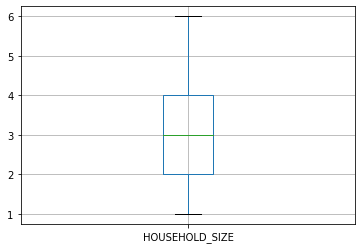

In [607]:
upper_limit = hotel['HOUSEHOLD_SIZE'].quantile(0.99)
lower_limit = hotel['HOUSEHOLD_SIZE'].quantile(0.01)

new_hotel = hotel[(hotel['HOUSEHOLD_SIZE'] <= upper_limit) & (hotel['HOUSEHOLD_SIZE'] >= lower_limit)]


boxplot_ad = new_hotel.boxplot(column=['HOUSEHOLD_SIZE'])  
plt.savefig('box2.png')

In [610]:
#(hotel['PROD_TOTPRICE'] == 0).sum()

0

In [535]:
(new_hotel['PROD_TOTPRICE']).count()

3742

In [536]:
(new_hotel).count()

ID                   3742
DOMAIN_ID            3742
MACHINE_ID           3742
SITE_SESSION_ID      3742
TRANS_FREQ           3742
DOMAIN_NAME          3742
DIRECTP_D            3742
PROD_NAME            3742
PROD_QTY             3742
PROD_TOTPRICE        3742
REF_DOMAIN_NAME      1684
DURATION             3742
PAGES_VIEWED         3742
HOUSEHOLD_SIZE       3742
CHILDREN_D           3742
CONNECTIONSPEED_D    3742
Ref_D                3742
LOG_PRICE            3742
dtype: int64

In [615]:

new_hotel.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
count,3742.000000,3.742000e+03,3.742000e+03,3.742000e+03,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,1875.715927,8.435314e+18,8.614598e+07,1.974250e+13,2.982897,0.481828,1.716996,164.805377,25.337767,18.341261,3.094869,0.603153,0.992250,0.450027,4.438632
std,1083.064908,4.548712e+18,6.797291e+06,2.748601e+13,4.124464,0.499736,1.387432,184.604758,22.819644,16.649645,1.454957,0.489309,0.087703,0.497563,1.616545
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,1.000000,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,938.250000,5.078454e+18,8.197324e+07,4.403941e+12,1.000000,0.000000,1.000000,72.792500,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.287612
50%,1875.500000,7.317461e+18,8.698025e+07,5.036265e+12,2.000000,0.000000,1.000000,116.970000,17.802734,13.000000,3.000000,1.000000,1.000000,0.000000,4.761917
75%,2811.750000,9.530953e+18,9.165186e+07,6.516099e+12,3.000000,1.000000,2.000000,200.980000,33.701172,24.000000,4.000000,1.000000,1.000000,1.000000,5.303205
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2848.039993,227.343750,141.000000,6.000000,1.000000,1.000000,1.000000,7.954386


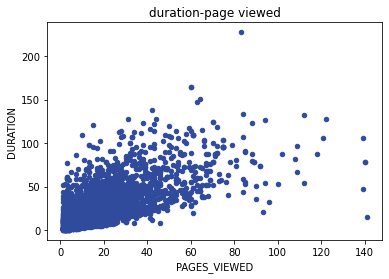

In [623]:
import matplotlib.pyplot as plt
s_p = new_hotel.plot.scatter(x='PAGES_VIEWED', y='DURATION',c='#304A9C',title = 'duration-page viewed')
plt.savefig('sca2.png')

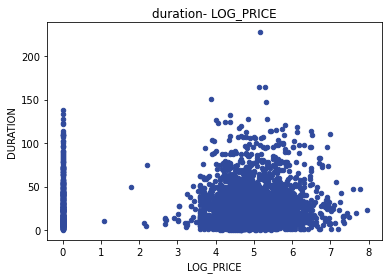

In [618]:
s_p = new_hotel.plot.scatter(x='LOG_PRICE', y='DURATION',c='#304A9C',title = 'duration- LOG_PRICE')
plt.savefig('sca1.png')

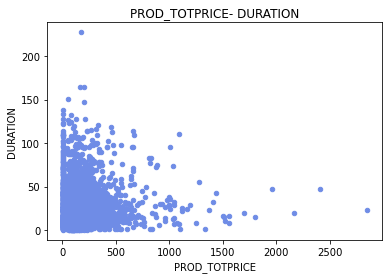

In [624]:
s_p = new_hotel.plot.scatter(x='PROD_TOTPRICE', y='DURATION',c='#6F8CE6',title = 'PROD_TOTPRICE- DURATION')
plt.savefig('sca3.png')

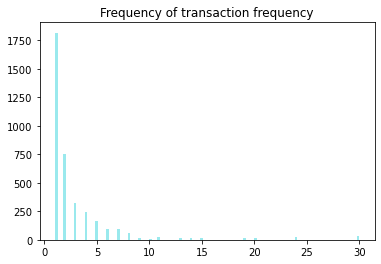

In [627]:
a_h = plt.hist(x=new_hotel['TRANS_FREQ'], bins='auto', color='#6FE0E6', alpha=0.7, rwidth=1)
plt.title('Frequency of transaction frequency')
plt.savefig('sca4.png')

<b>section B</b>

In [543]:
#pairwise correlations tests

In [544]:
new_h.corr(method='pearson')['DURATION']

TRANS_FREQ          -0.011166
DIRECTP_D           -0.182338
PROD_QTY             0.127707
PROD_TOTPRICE        0.032444
DURATION             1.000000
PAGES_VIEWED         0.685065
HOUSEHOLD_SIZE       0.015729
CHILDREN_D           0.045334
CONNECTIONSPEED_D   -0.021462
Ref_D                0.003776
LOG_PRICE           -0.072548
Name: DURATION, dtype: float64

In [545]:
new_h = new_hotel.drop(['ID','DOMAIN_ID','MACHINE_ID','SITE_SESSION_ID','DOMAIN_NAME','PROD_NAME','REF_DOMAIN_NAME'],axis=1)

new_h.head()

,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,Ref_D,LOG_PRICE
0,1,1,32,2848.039993,23.328125,13,6,1,1,0.0,7.954386
1,1,0,1,2407.939995,47.109375,17,2,1,1,1.0,7.786527
2,1,1,5,2169.000000,20.058594,19,1,0,1,1.0,7.682022
3,1,0,5,1959.699997,47.546875,39,1,0,1,0.0,7.580547
4,2,1,3,1798.000000,14.599609,19,1,0,1,1.0,7.494430


In [621]:
new_h.describe().to_csv("my_description.csv")

In [547]:
import statsmodels.api as sm

In [548]:
indepvar=sm.add_constant(new_h[['TRANS_FREQ','DIRECTP_D','PROD_QTY','PROD_TOTPRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D','Ref_D','LOG_PRICE']])

In [549]:
mod=sm.OLS(new_h.DURATION,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     361.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:05:33   Log-Likelihood:                -15746.
No. Observations:                3742   AIC:                         3.151e+04
Df Residuals:                    3731   BIC:                         3.158e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.8308      3.23

In [630]:
print(res.f_test('DIRECTP_D'))

<F test: F=26.269315713499708, p=3.120170023989961e-07, df_denom=3.74e+03, df_num=1>


In [550]:
second=sm.add_constant(new_h[['DIRECTP_D','PROD_TOTPRICE','PAGES_VIEWED','CHILDREN_D','Ref_D']])
mod=sm.OLS(new_h.DURATION,second)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     721.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:05:33   Log-Likelihood:                -15748.
No. Observations:                3742   AIC:                         3.151e+04
Df Residuals:                    3736   BIC:                         3.155e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.2411      0.669     13.808

The equation:
DURATION = 9.24 - 6.4*DIRECTP_D + 0.005*PROD_TOTPRICE + 0.93*PAGES_VIEWED + 1.25*CHILDREN_D + 1.40*REF_D  

In [551]:
page_1=sm.add_constant(new_h[['TRANS_FREQ','DIRECTP_D','PROD_QTY','PROD_TOTPRICE','DURATION','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D','Ref_D','LOG_PRICE']])

mod=sm.OLS(new_h.PAGES_VIEWED,page_1)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     349.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:05:33   Log-Likelihood:                -14596.
No. Observations:                3742   AIC:                         2.921e+04
Df Residuals:                    3731   BIC:                         2.928e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6139      2.38

In [552]:
page_2=sm.add_constant(new_h[['TRANS_FREQ','DIRECTP_D','PROD_QTY','PROD_TOTPRICE','DURATION','LOG_PRICE']])

mod=sm.OLS(new_h.PAGES_VIEWED,page_2)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     583.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:05:33   Log-Likelihood:                -14596.
No. Observations:                3742   AIC:                         2.921e+04
Df Residuals:                    3735   BIC:                         2.925e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4081      0.770      8.318

The equation:
PAGES_VIEWED = 6.41 - 2.08*DIRECTP_D + 0.90*PROD_QTY   -0.004*PROD_TOTPRICE + 0.49*DURATION -0.67*LOG_PRICE +0.10*TRANS_FREQ 